In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader as web
import pprint
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm


In [2]:
from datetime import datetime
gold = web.DataReader("GOLD","quandl",
                      datetime(2004,11,18),
                      datetime(2010,6,24),
                      access_key = 'RGqizhsWNp9P1gM7wx5u'
                     ).sort_index()
df = pd.DataFrame(gold['AdjClose'])


In [3]:
df.index

DatetimeIndex(['2004-11-18', '2004-11-19', '2004-11-22', '2004-11-23',
               '2004-11-24', '2004-11-26', '2004-11-29', '2004-11-30',
               '2004-12-01', '2004-12-02',
               ...
               '2010-06-11', '2010-06-14', '2010-06-15', '2010-06-16',
               '2010-06-17', '2010-06-18', '2010-06-21', '2010-06-22',
               '2010-06-23', '2010-06-24'],
              dtype='datetime64[ns]', name='Date', length=1409, freq=None)

Text(0, 0.5, 'Price')

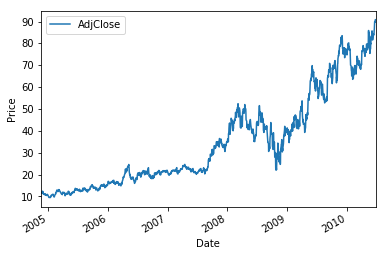

In [5]:
price = df['AdjClose']
date = df.index
ts = pd.DataFrame(price.values,index = date,columns = ['AdjClose'])
ts.plot()
plt.ylabel('Price')

In [55]:
###线性模型减趋势

In [62]:
y = price.values
x = np.arange(1,len(y)+1)

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1),y)
price_detrend = model.predict(x.reshape(-1,1))-y

Text(0.5, 1.0, 'GLD Price vs Regression')

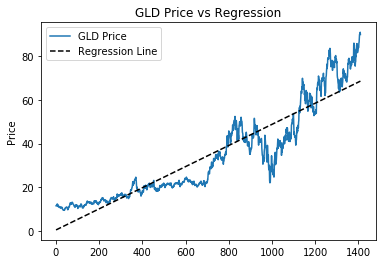

In [102]:
b1 = model.coef_
b0 = model.intercept_
plt.plot(x,y,x,b1*x+b0,'--k')
plt.legend(['GLD Price'] +['Regression Line'],loc = 'best')
plt.ylabel('Price')
plt.title('GLD Price vs Regression')

Text(0.5, 1.0, 'Detrended GLD Price Time Series')

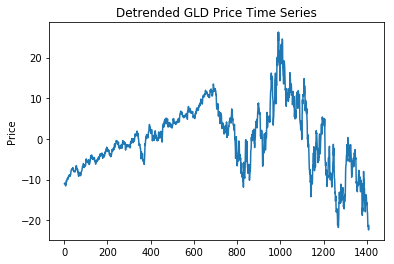

In [107]:
plt.plot(x,price_detrend)
plt.ylabel('Price')
plt.title('Detrended GLD Price Time Series')

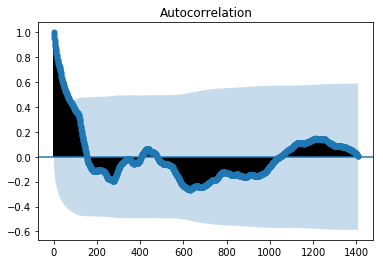

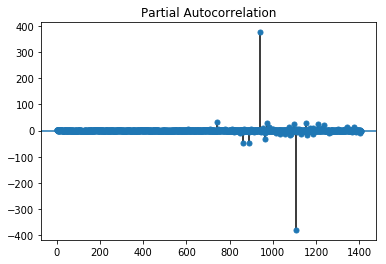

In [116]:
import statsmodels.api as sm

ax1 = acf_y = sm.graphics.tsa.plot_acf(price_detrend)
ax2 = pacf_y = sm.graphics.tsa.plot_pacf(price_detrend)

Text(0.5, 1.0, 'GLD Return Time Series')

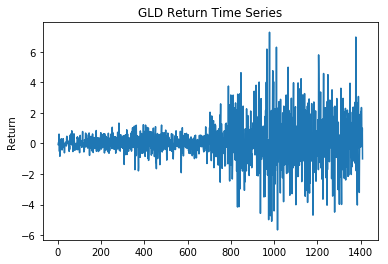

In [125]:
#plot the first difference of the data
rtn = price.diff()[1:]
plt.plot(x[1:],rtn)
plt.ylabel('Return')
plt.title('GLD Return Time Series')

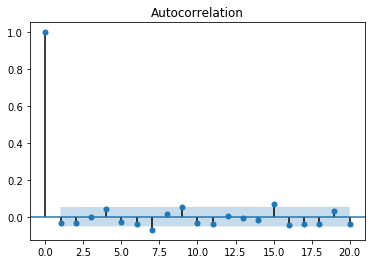

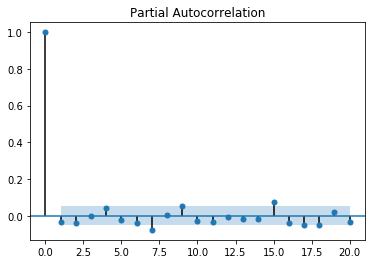

In [126]:
#plot the autocorrelation function for the first difference data
acf_r = sm.graphics.tsa.plot_acf(rtn,lags = 20)
pacf_r = sm.graphics.tsa.plot_pacf(rtn,lags = 20)

In [133]:
#估计参数
from pandas import Series
df_rtn = pd.DataFrame(rtn)
df_rtn.index = pd.DatetimeIndex(start = '2004-11-18',periods = 1408,freq = 'D')
arma_modl = sm.tsa.ARMA(df_rtn,(6,0)).fit()

G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  after removing the cwd from sys.path.


In [135]:
arma_modl.params

const             0.055559
ar.L1.AdjClose   -0.033796
ar.L2.AdjClose   -0.034730
ar.L3.AdjClose   -0.001145
ar.L4.AdjClose    0.038865
ar.L5.AdjClose   -0.026246
ar.L6.AdjClose   -0.037469
dtype: float64

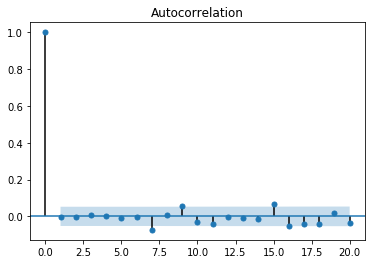

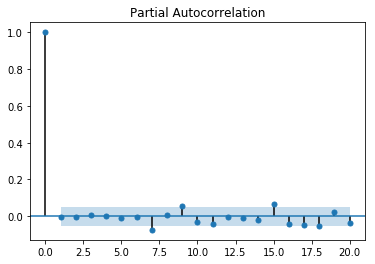

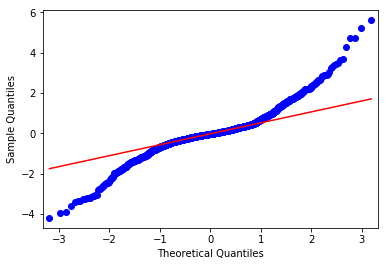

In [142]:
from statsmodels.graphics.api import qqplot
residl = arma_modl.resid
acf_residl = sm.graphics.tsa.plot_acf(residl,lags = 20)
pacd_residl = sm.graphics.tsa.plot_pacf(residl,lags = 20)
fig = qqplot(residl,line = 'q',fit = True)

Text(0.5, 1.0, 'GLD Return AR(6) Residuals Time Series')

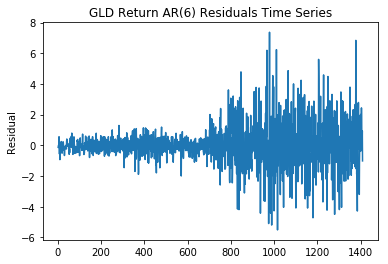

In [150]:
plt.plot(x[1:],residl)
plt.ylabel('Residual')
plt.title('GLD Return AR(6) Residuals Time Series')

In [151]:
#对detrended data 先做MA(1)

In [165]:
df_detrend = pd.DataFrame(price_detrend)
df_detrend.index = pd.DatetimeIndex(start = '2004-11-18',periods = 1409,freq = 'D')
arma_mod2 = sm.tsa.ARMA(df_detrend,(0,1)).fit()

G:\application\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [166]:
arma_mod2.params

const     -0.010191
ma.L1.0    0.896539
dtype: float64

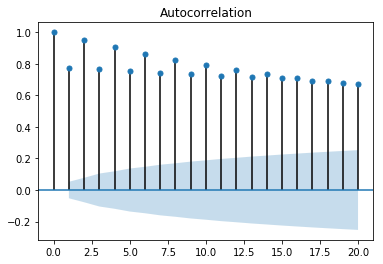

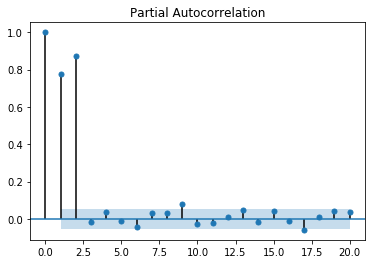

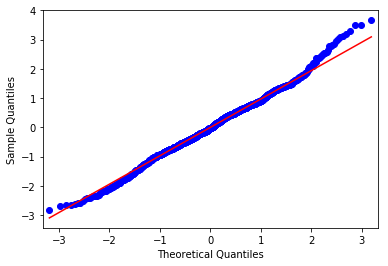

In [176]:
resid2 = arma_mod2.resid
acf_resid2 = sm.graphics.tsa.plot_acf(resid2,lags = 20)
pacf_resid2 = sm.graphics.tsa.plot_pacf(resid2,lags = 20)
fig = qqplot(resid2,line = 'q',fit = 'True')

In [168]:
resid2

2004-11-18   -11.009963
2004-11-19    -5.414466
2004-11-20    -7.301766
2004-11-21    -5.482336
2004-11-22    -6.675802
2004-11-23    -6.099451
2004-11-24    -6.472656
2004-11-25    -5.495145
2004-11-26    -6.426045
2004-11-27    -4.683454
2004-11-28    -6.383037
2004-11-29    -4.603336
2004-11-30    -5.944489
2004-12-01    -4.526922
2004-12-02    -5.630671
2004-12-03    -4.686070
2004-12-04    -5.771150
2004-12-05    -4.431458
2004-12-06    -5.677430
2004-12-07    -4.081991
2004-12-08    -5.522797
2004-12-09    -4.239671
2004-12-10    -5.347252
2004-12-11    -4.025278
2004-12-12    -5.468513
2004-12-13    -4.360569
2004-12-14    -5.210509
2004-12-15    -4.343931
2004-12-16    -4.903255
2004-12-17    -4.362680
                ...    
2008-08-28    -9.521929
2008-08-29    -9.270186
2008-08-30    -7.980451
2008-08-31    -8.132440
2008-09-01    -4.805396
2008-09-02    -3.707709
2008-09-03    -6.527092
2008-09-04    -4.074132
2008-09-05    -8.894185
2008-09-06    -4.221611
2008-09-07   -11

In [178]:
arma_mod3 = sm.tsa.ARMA(df_detrend,(1,1)).fit()
arma_mod3.params

const     -1.927246
ar.L1.0    0.989606
ma.L1.0   -0.028688
dtype: float64

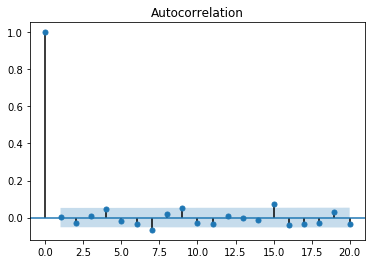

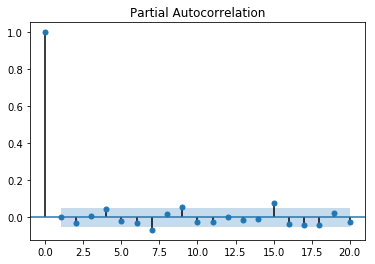

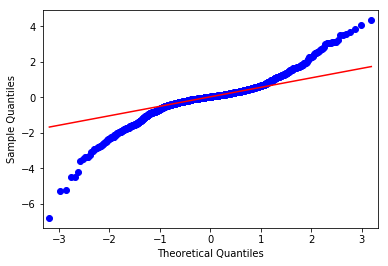

In [181]:
resid3 = arma_mod3.resid
acf_resid3 = sm.graphics.tsa.plot_acf(resid3,lags = 20)
pacf_resid3 = sm.graphics.tsa.plot_pacf(resid3,lags = 20)
fig = qqplot(resid3,line = 'q',fit = True)

In [191]:
gold = web.DataReader("BTC/USD","quandl",
                      datetime(2004,11,18),
                      datetime(2010,6,24),
                      access_key = 'RGqizhsWNp9P1gM7wx5u'
                     ).sort_index()

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/BTC/USD.csv?start_date=2004-11-18&end_date=2010-06-24&order=asc&api_key=RGqizhsWNp9P1gM7wx5u
Response Text:
b'code,message\nQECx02,You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.\n'

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/EUR/USD/history?period1=1262314800&period2=1562551199&interval=1d&frequency=1d&filter=history
Response Text:
b'<html>\n<meta charset=\'utf-8\'>\n<script>\nvar u=\'https://www.yahoo.com/?err=404&err_url=https%3a%2f%2ffinance.yahoo.com%2fquote%2fEUR%2fUSD%2fhistory%3fperiod1%3d1262314800%26period2%3d1562551199%26interval%3d1d%26frequency%3d1d%26filter%3dhistory\';\nif(window!=window.top){\n  document.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'+new Date().getTime()+\'&_R=\'+encodeURIComponent(document.referrer)+\'&err=404&err_url=\'+u+\'" width="0px" height="0px"/>\');\n}else{\n  window.location.replace(u);\n}\n</script>\n<noscript><META http-equiv="refresh" content="0;URL=\'https://www.yahoo.com/?err=404&err_url=https%3a%2f%2ffinance.yahoo.com%2fquote%2fEUR%2fUSD%2fhistory%3fperiod1%3d1262314800%26period2%3d1562551199%26interval%3d1d%26frequency%3d1d%26filter%3dhistory\'"></noscript>\n</html>\n'

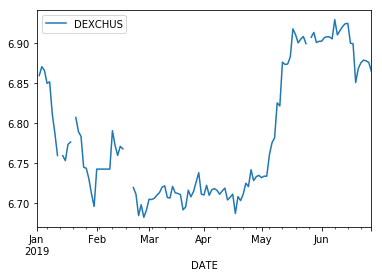

In [214]:
CHY = web.DataReader('DEXCHUS', 'fred')
CHY['2019-01-01':].plot()

ModuleNotFoundError: No module named 'pandas_datareader.oanda'

In [222]:
+